In [45]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [46]:
with open('results.json') as f:
    data=json.load(f)

In [47]:
df=pd.DataFrame(data)
df.shape

(10, 10)

In [48]:
df

,rouge1,rouge2,rougeL,rougeLsum,gen_len,model,data,reduced_vocabulary,summary_type,max_seq_len
0,22.0614,4.4126,18.0158,18.0454,442.259875,mbart-large-cc25,LongSumEt,True,bulletpoints,1024
1,27.9854,9.8125,19.8103,24.7255,465.295455,mbart-large-cc25,riigikogu,True,bulletpoints,2048
2,37.9071,16.2802,31.5887,35.1778,241.599506,mbart-large-cc25,samsum_ee,True,text,1024
3,37.0547,14.8011,30.5113,34.1101,456.857849,mbart-large-cc25,samsum_ee,True,text,2048
4,36.1651,15.9668,28.3390,33.7670,113.454545,mlong-t5-tglobal-base,riigikogu,True,bulletpoints,2048
5,36.8194,16.7082,29.1550,34.3118,109.568182,mlong-t5-tglobal-base,riigikogu,False,bulletpoints,2048
6,26.0263,8.3355,22.0547,22.0598,52.320166,google/mt5-base,LongSumEt,True,bulletpoints,1024
7,37.7457,15.6536,31.6590,34.5857,31.359703,google/mt5-base,samsum_ee,True,text,1024
8,32.7898,13.0878,28.3526,30.7215,31.597033,google/mt5-small,samsum_ee,True,text,1024
9,27.3205,9.7931,24.0778,25.7423,30.681088,google/umt5-small,samsum_ee,True,text,1024


## visualize

In [49]:
value_vars=['rouge1',	'rouge2',	'rougeL',	'rougeLsum',	'gen_len']
id_vars={'model', 'data', 'reduced_vocabulary', 'summary_type', 'max_seq_len'}
df_long=df.melt(value_vars=value_vars, id_vars=id_vars)

### model summary type per model per metric

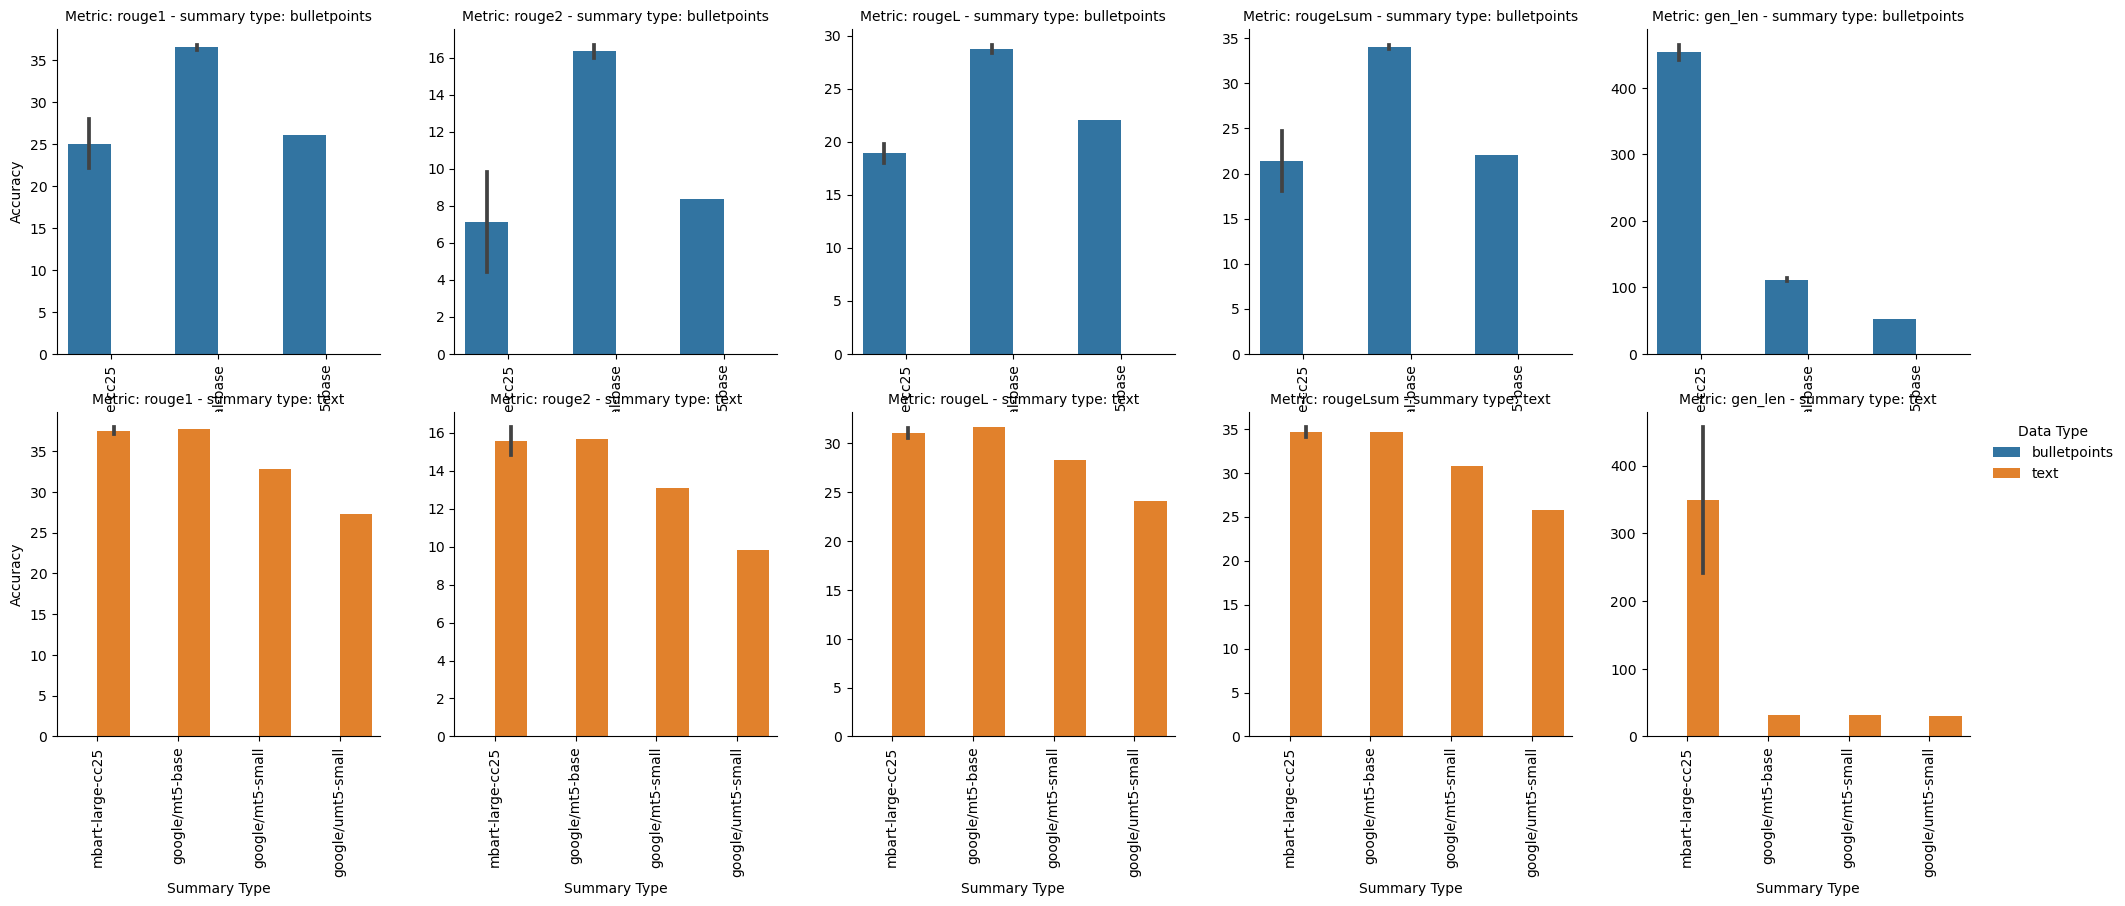

In [50]:
g = sns.catplot(
    data=df_long,
    x='model',
    y='value',
    hue='summary_type',           # Differentiate bars by data
    col='variable',          # Create columns for each model
    row='summary_type',   # Create rows for each sequence length
    kind='bar',
    height=4,
    aspect=1,
    sharey=False,
    sharex=False,
)

g.set_axis_labels("Summary Type", "Accuracy")
g.set_titles("Metric: {col_name} - summary type: {row_name}")
g.add_legend(title="Data Type")
g.tick_params(axis='x', rotation=90)

### summary type vs models

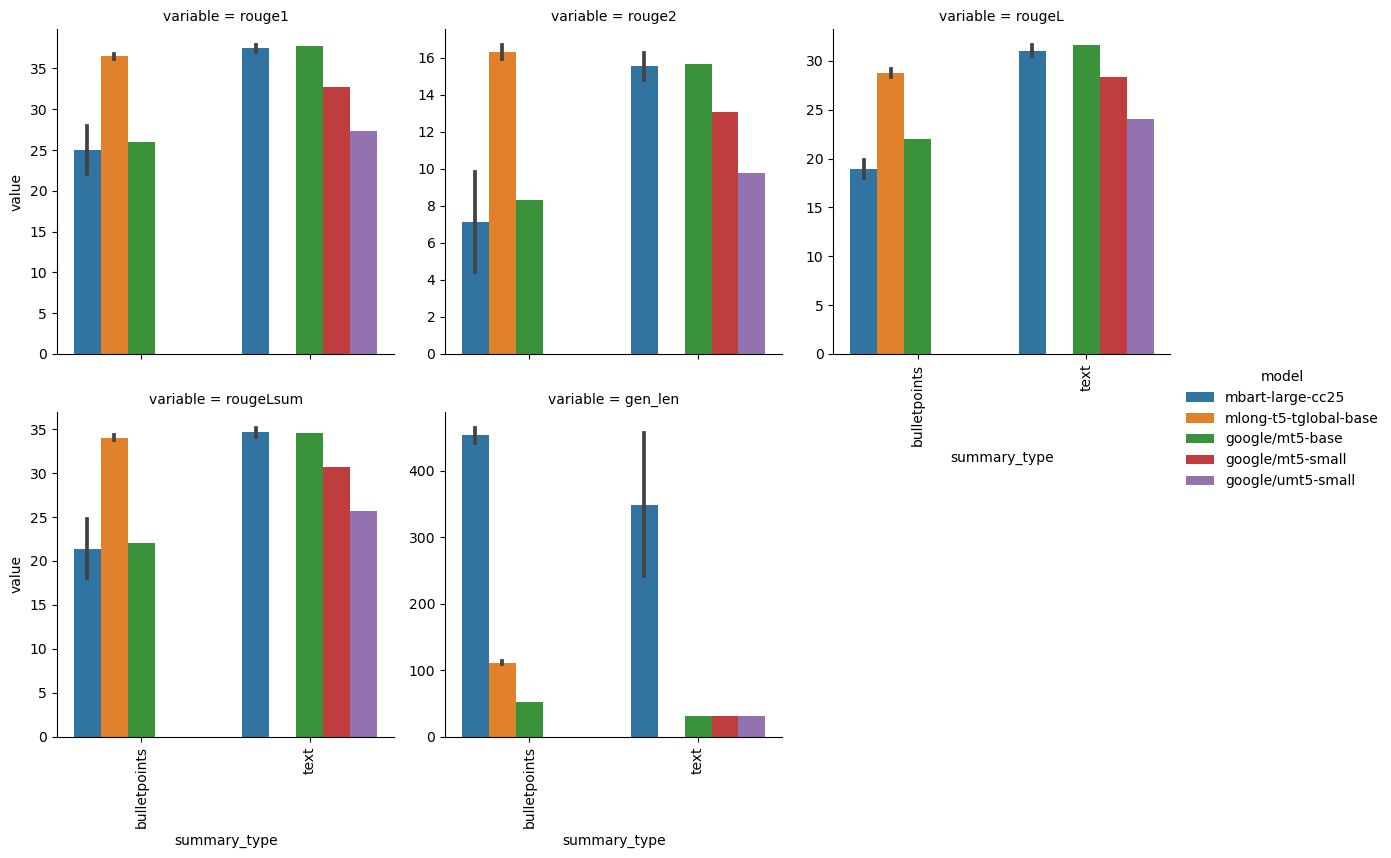

In [51]:
g = sns.catplot(
    data=df_long,
    x='summary_type',
    y='value',
    hue='model',           # Differentiate bars by data
    col='variable',          # Create columns for each model
    col_wrap=3,
    kind='bar',
    height=4,
    aspect=1,
    sharey=False,
)


g.tick_params(axis='x', rotation=90)

### summary type vs models (input max len 1024)

In [52]:
df_long[(df_long.max_seq_len==1024)&(df_long.variable!='gen_len')]

,summary_type,model,data,reduced_vocabulary,max_seq_len,variable,value
0,bulletpoints,mbart-large-cc25,LongSumEt,True,1024,rouge1,22.0614
2,text,mbart-large-cc25,samsum_ee,True,1024,rouge1,37.9071
6,bulletpoints,google/mt5-base,LongSumEt,True,1024,rouge1,26.0263
7,text,google/mt5-base,samsum_ee,True,1024,rouge1,37.7457
8,text,google/mt5-small,samsum_ee,True,1024,rouge1,32.7898
9,text,google/umt5-small,samsum_ee,True,1024,rouge1,27.3205
10,bulletpoints,mbart-large-cc25,LongSumEt,True,1024,rouge2,4.4126
12,text,mbart-large-cc25,samsum_ee,True,1024,rouge2,16.2802
16,bulletpoints,google/mt5-base,LongSumEt,True,1024,rouge2,8.3355
17,text,google/mt5-base,samsum_ee,True,1024,rouge2,15.6536


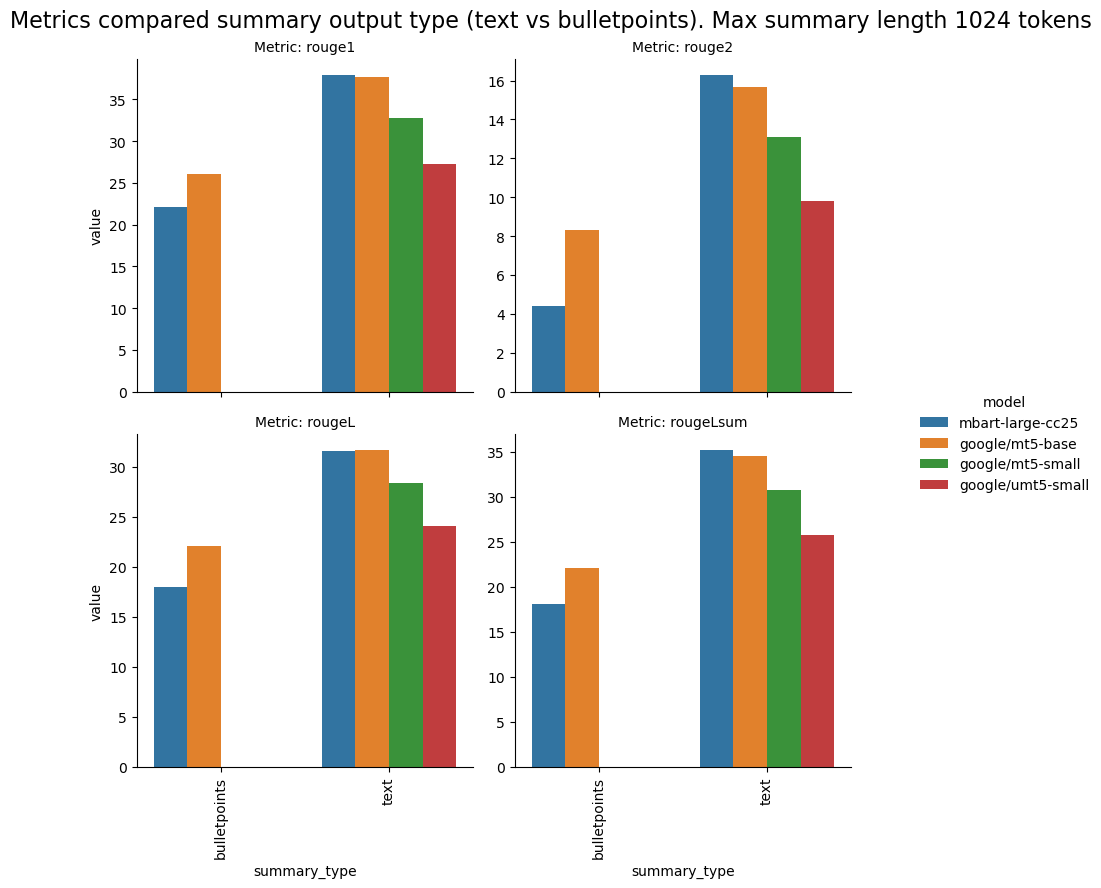

In [53]:
g = sns.catplot(
    data=df_long[(df_long.max_seq_len==1024)&(df_long.variable!='gen_len')],
    x='summary_type',
    y='value',
    hue='model',           # Differentiate bars by data
    col='variable',          # Create columns for each model
    col_wrap=2,
    kind='bar',
    height=4,
    aspect=1,
    sharey=False,

)


g.set_titles("Metric: {col_name}")
g.fig.suptitle('Metrics compared summary output type (text vs bulletpoints). Max summary length 1024 tokens', fontsize=16, y=1.02)
g.tick_params(axis='x', rotation=90)

### summary type vs models (input max len 2048)

In [54]:
df_long[(df_long.max_seq_len==2048)&(df_long.variable!='gen_len')]

,summary_type,model,data,reduced_vocabulary,max_seq_len,variable,value
1,bulletpoints,mbart-large-cc25,riigikogu,True,2048,rouge1,27.9854
3,text,mbart-large-cc25,samsum_ee,True,2048,rouge1,37.0547
4,bulletpoints,mlong-t5-tglobal-base,riigikogu,True,2048,rouge1,36.1651
5,bulletpoints,mlong-t5-tglobal-base,riigikogu,False,2048,rouge1,36.8194
11,bulletpoints,mbart-large-cc25,riigikogu,True,2048,rouge2,9.8125
13,text,mbart-large-cc25,samsum_ee,True,2048,rouge2,14.8011
14,bulletpoints,mlong-t5-tglobal-base,riigikogu,True,2048,rouge2,15.9668
15,bulletpoints,mlong-t5-tglobal-base,riigikogu,False,2048,rouge2,16.7082
21,bulletpoints,mbart-large-cc25,riigikogu,True,2048,rougeL,19.8103
23,text,mbart-large-cc25,samsum_ee,True,2048,rougeL,30.5113


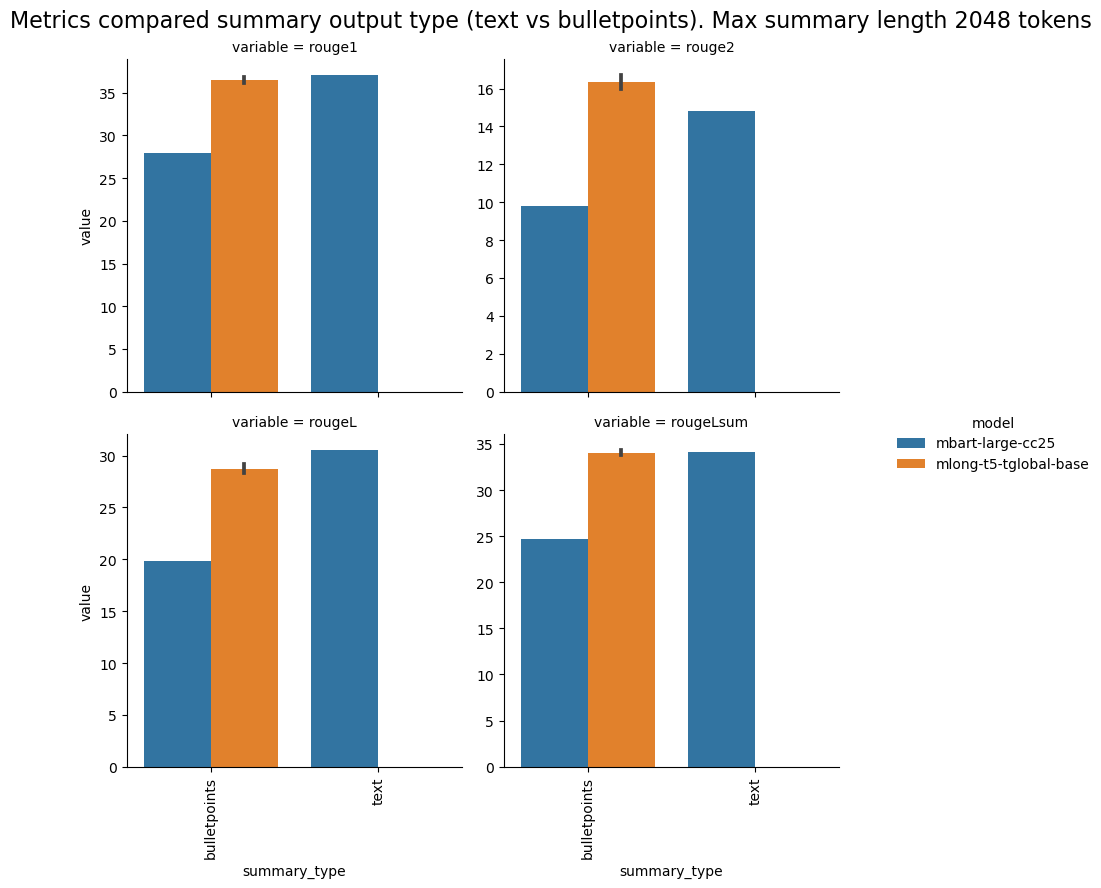

In [55]:
g = sns.catplot(
    data=df_long[(df_long.max_seq_len==2048)&(df_long.variable!='gen_len')],
    x='summary_type',
    y='value',
    hue='model',           # Differentiate bars by data
    col='variable',          # Create columns for each model
    col_wrap=2,
    kind='bar',
    height=4,
    aspect=1,
    sharey=False,
)

g.fig.suptitle('Metrics compared summary output type (text vs bulletpoints). Max summary length 2048 tokens', fontsize=16, y=1.02)
g.tick_params(axis='x', rotation=90)

## Riigikogu dataset

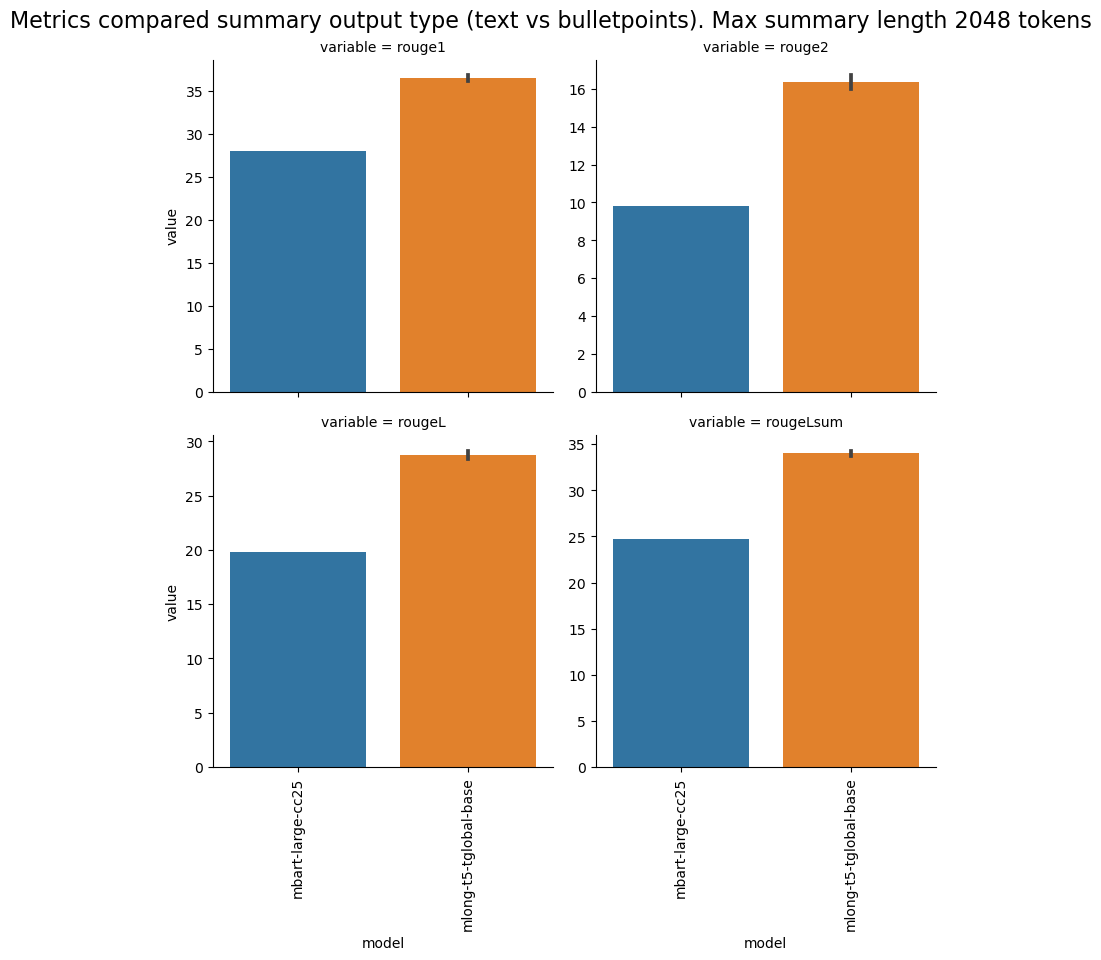

In [56]:
g = sns.catplot(
    data=df_long[(df_long.max_seq_len==2048)&(df_long.variable!='gen_len')&(df_long.data=='riigikogu')],
    x='model',
    y='value',
    col='variable',          # Create columns for each model
    col_wrap=2,
    kind='bar',
    height=4,
    aspect=1,
    sharey=False,
)

g.fig.suptitle('Metrics compared summary output type (text vs bulletpoints). Max summary length 2048 tokens', fontsize=16, y=1.02)
g.tick_params(axis='x', rotation=90)

In [57]:
df_long[(df_long.max_seq_len==2048)&(df_long.variable!='gen_len')&(df_long.data=='riigikogu')]

,summary_type,model,data,reduced_vocabulary,max_seq_len,variable,value
1,bulletpoints,mbart-large-cc25,riigikogu,True,2048,rouge1,27.9854
4,bulletpoints,mlong-t5-tglobal-base,riigikogu,True,2048,rouge1,36.1651
5,bulletpoints,mlong-t5-tglobal-base,riigikogu,False,2048,rouge1,36.8194
11,bulletpoints,mbart-large-cc25,riigikogu,True,2048,rouge2,9.8125
14,bulletpoints,mlong-t5-tglobal-base,riigikogu,True,2048,rouge2,15.9668
15,bulletpoints,mlong-t5-tglobal-base,riigikogu,False,2048,rouge2,16.7082
21,bulletpoints,mbart-large-cc25,riigikogu,True,2048,rougeL,19.8103
24,bulletpoints,mlong-t5-tglobal-base,riigikogu,True,2048,rougeL,28.3390
25,bulletpoints,mlong-t5-tglobal-base,riigikogu,False,2048,rougeL,29.1550
31,bulletpoints,mbart-large-cc25,riigikogu,True,2048,rougeLsum,24.7255


## Reduced vocabulary effect

In [58]:
df_reduced_vocab=df[df.model=='mlong-t5-tglobal-base']
df_long_reduced_vocab=df_reduced_vocab.melt(value_vars=value_vars, id_vars=id_vars)
df_long_reduced_vocab

,summary_type,model,data,reduced_vocabulary,max_seq_len,variable,value
0,bulletpoints,mlong-t5-tglobal-base,riigikogu,True,2048,rouge1,36.165100
1,bulletpoints,mlong-t5-tglobal-base,riigikogu,False,2048,rouge1,36.819400
2,bulletpoints,mlong-t5-tglobal-base,riigikogu,True,2048,rouge2,15.966800
3,bulletpoints,mlong-t5-tglobal-base,riigikogu,False,2048,rouge2,16.708200
4,bulletpoints,mlong-t5-tglobal-base,riigikogu,True,2048,rougeL,28.339000
5,bulletpoints,mlong-t5-tglobal-base,riigikogu,False,2048,rougeL,29.155000
6,bulletpoints,mlong-t5-tglobal-base,riigikogu,True,2048,rougeLsum,33.767000
7,bulletpoints,mlong-t5-tglobal-base,riigikogu,False,2048,rougeLsum,34.311800
8,bulletpoints,mlong-t5-tglobal-base,riigikogu,True,2048,gen_len,113.454545
9,bulletpoints,mlong-t5-tglobal-base,riigikogu,False,2048,gen_len,109.568182


C:\Users\RistoHinno\anaconda3\lib\site-packages\seaborn\categorical.py:3201: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


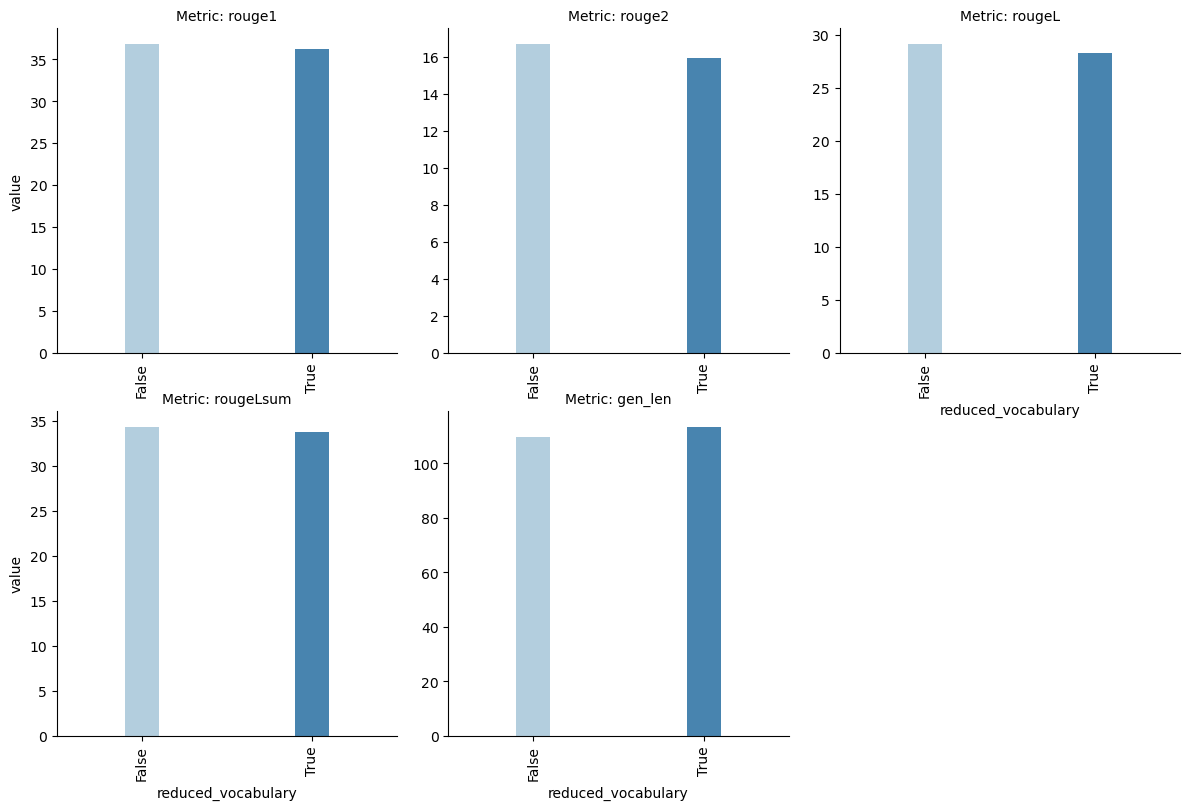

In [59]:
g = sns.catplot(
    data=df_long_reduced_vocab,
    x='reduced_vocabulary',
    y='value',
    col='variable',          
    kind='bar',
    height=4,
    aspect=1,
    sharey=False,
    sharex=False,
    width=0.2,
    palette='Blues',
    col_wrap=3
)

g.set_titles("Metric: {col_name}")
g.tick_params(axis='x', rotation=90)

## sequence length effect

In [60]:
df_seg_len=df[(df.model=='mbart-large-cc25')&(df.data=='samsum_ee')]
df_seg_len.shape

(2, 10)

In [61]:
df_long_seq_len=df_seg_len.melt(value_vars=value_vars, id_vars=id_vars)
df_long_seq_len

,summary_type,model,data,reduced_vocabulary,max_seq_len,variable,value
0,text,mbart-large-cc25,samsum_ee,True,1024,rouge1,37.907100
1,text,mbart-large-cc25,samsum_ee,True,2048,rouge1,37.054700
2,text,mbart-large-cc25,samsum_ee,True,1024,rouge2,16.280200
3,text,mbart-large-cc25,samsum_ee,True,2048,rouge2,14.801100
4,text,mbart-large-cc25,samsum_ee,True,1024,rougeL,31.588700
5,text,mbart-large-cc25,samsum_ee,True,2048,rougeL,30.511300
6,text,mbart-large-cc25,samsum_ee,True,1024,rougeLsum,35.177800
7,text,mbart-large-cc25,samsum_ee,True,2048,rougeLsum,34.110100
8,text,mbart-large-cc25,samsum_ee,True,1024,gen_len,241.599506
9,text,mbart-large-cc25,samsum_ee,True,2048,gen_len,456.857849


C:\Users\RistoHinno\anaconda3\lib\site-packages\seaborn\categorical.py:3201: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


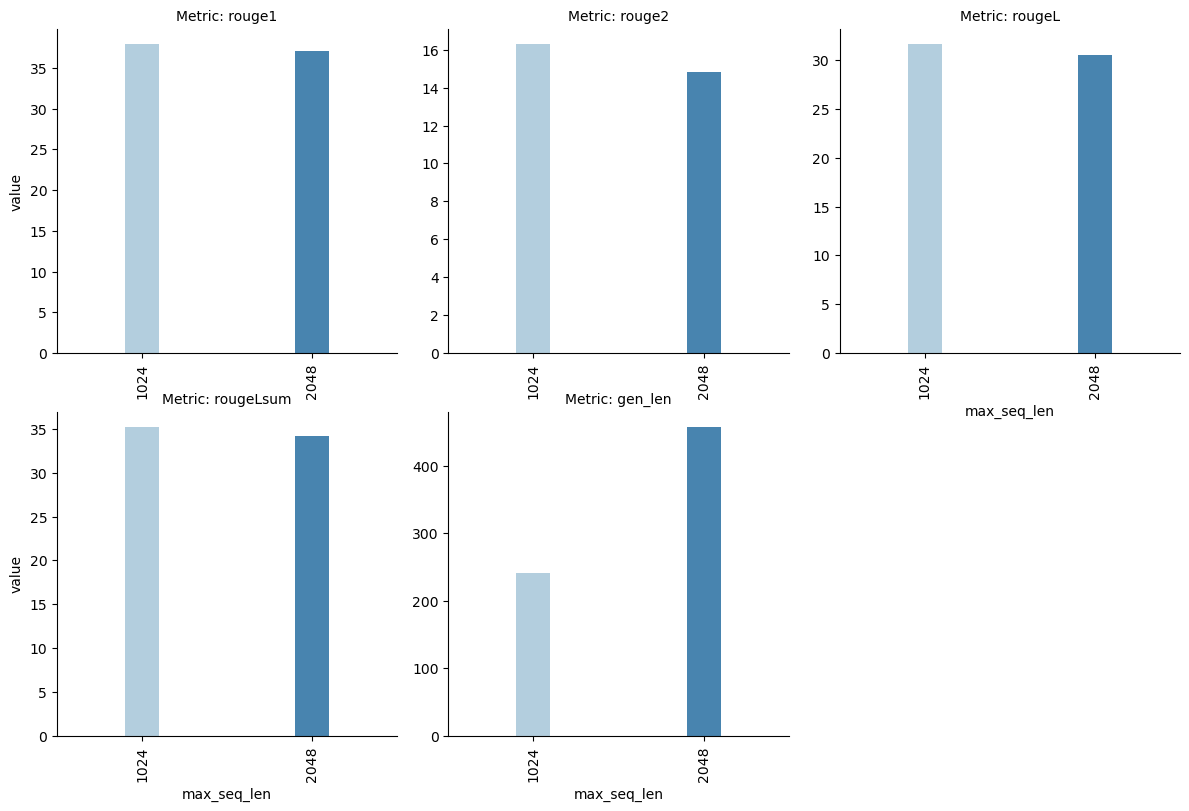

In [62]:
g = sns.catplot(
    data=df_long_seq_len,
    x='max_seq_len',
    y='value',
    col='variable',            
    kind='bar',
    height=4,
    aspect=1,
    sharey=False,
    sharex=False,
    width=0.2,
    palette='Blues',
    col_wrap=3
)


g.set_titles("Metric: {col_name}")
g.tick_params(axis='x', rotation=90)